# Smile Data Analysis

## Standard Imports

In [ ]:
# For creating dataframe
import pandas as pd
import numpy as np

#For visualizing null values
#import missingno as msno

# For Data-Visualization
import matplotlib.pyplot as plt #for creating visualizations
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

# Importing Statsmodel
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import scipy

# Ignoring Warnings
import warnings 
warnings.filterwarnings("ignore")

## Loading the Data

In [2]:
data = pd.read_csv("C:/projects/100datasets/100datasets/warm-up/classifiers/smiley.csv")

data.head()

,x,y,t
0,29.25,55.9,1
1,30.15,55.3,1
2,28.65,54.4,1
3,30.75,53.5,1
4,31.75,54.7,1


In [3]:
data.describe(include = "all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,1394.0,53.554735,19.416436,1.65,36.45,53.05,71.65,95.25
y,1394.0,45.273673,22.107190,3.20,27.25,43.20,69.40,77.80
t,1394.0,4.650646,1.750985,0.00,4.00,5.00,6.00,7.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 3 columns):
x    1394 non-null float64
y    1394 non-null float64
t    1394 non-null int64
dtypes: float64(2), int64(1)
memory usage: 32.8 KB


In [5]:
##data.drop(["Unnamed: 0", "family"], axis = 1, inplace=True)

In [6]:
data.isna().sum()

x    0
y    0
t    0
dtype: int64

In [7]:
#Creating a mapper to change the column_type

#typeMapper_default = {   
#    "t" : "category"
#}

#data = data.astype(typeMapper_default)
#data.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis

### Nullity Analysis

In [8]:
#msno.matrix(data);

### Univariate Analysis

#### Real-valued Features

##### x plot

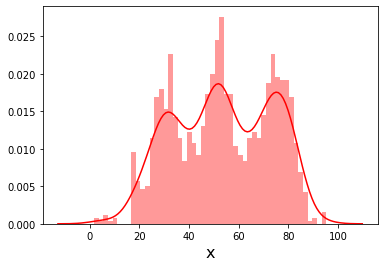

In [9]:
sns.distplot(data["x"], color="red", bins=50);

##### y plot

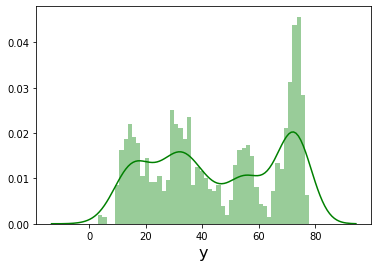

In [10]:
sns.distplot(data["y"], color="green", bins= 50)

##### t plot

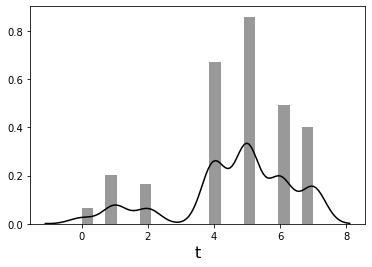

In [11]:
sns.distplot(data["t"], color="black", bins= 20);

In [12]:
data.corr()

,x,y,t
x,1.000000,0.008495,0.019099
y,0.008495,1.000000,0.269883
t,0.019099,0.269883,1.000000


#### Categorical Variables

##### t plot

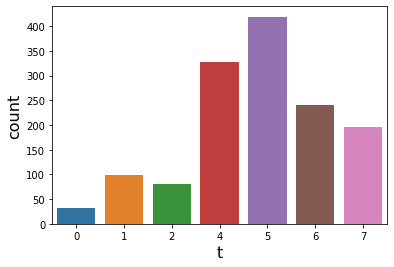

In [13]:
sns.countplot(data["t"]);

### Bivariate Analysis

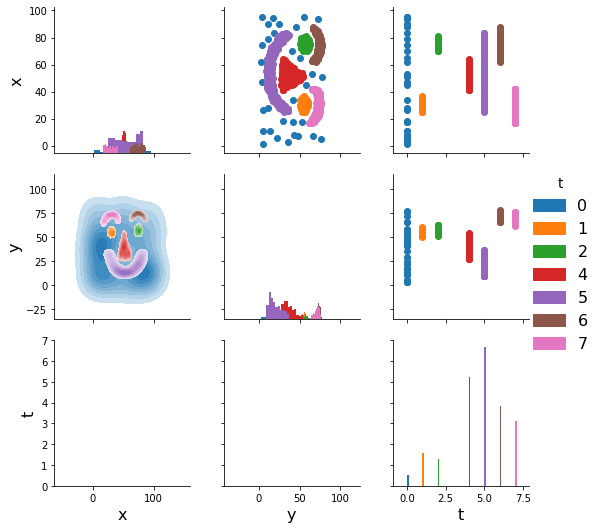

In [14]:
g = sns.PairGrid(data, hue = "t")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()

From the above pair plot, we can infer that both father and mother's height is positively correlated with the midParent height. Also, as the child's height increases, the chances of the child being a male is greater.

### Correlation Matrix

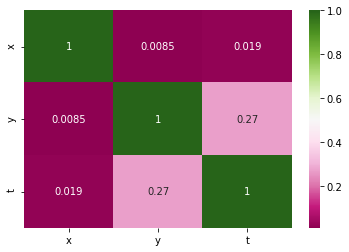

In [15]:
sns.heatmap(data.corr(), cmap="PiYG", annot=True);

In [16]:
#This needs to be changed ****
#mapping = {'male': 0, 'female': 1}
#data = data.replace({'gender': mapping})
#data.head()

### Classification

In [84]:
def plot_model(name,X,y,X_train,X_test,y_train,y_test,classifier):

    from matplotlib.colors import ListedColormap

    figure = plt.figure(figsize=(10, 5))
    h = .02 # step size in the mesh

    x_min, x_max = X.values[:, 0].min() - .5, X.values[:, 0].max() + .5
    y_min, y_max = X.values[:, 1].min() - .5, X.values[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    print("xx",xx.shape)
    print("yy",yy.shape)
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FF00FF', '#00FFFF'])
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())


    ax = plt.subplot(1, 2, 2)

    #if hasattr(classifier, "decision_function"):
    #    print("decision function")
    #    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    #    print(Z.shape)
    #else:
    #    print("predict_proba")
    #    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    #    print(Z.shape)
    Z =    classifier.predict(np.c_[xx.ravel(), yy.ravel()]) 
    print(Z.shape)
    

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
    #        size=15, horizontalalignment='right')

In [85]:
# Let us standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X, y = data[['x','y']], data['t'].astype('category')
X = pd.DataFrame(scaler.fit_transform(X), columns=('x', 'y'))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 )
X_test.describe()



,x,y
count,349.000000,349.000000
mean,-0.049315,0.008802
std,0.993332,1.029179
min,-2.627827,-1.826924
25%,-0.968843,-0.926442
50%,-0.077526,-0.084784
75%,0.834400,1.136976
max,2.122431,1.435629


### 1. SVM

In [86]:
# fit the model, don't regularize for illustration purposes
from sklearn import svm
classifier = svm.SVC(kernel='linear',probability=True, C=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
matrix = confusion_matrix (y_test, y_pred)
report = classification_report (y_test, y_pred)
print (matrix)
print (report)

[[ 0  2  0  0  4  0  0]
 [ 0 31  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0 73  2  0  0]
 [ 0  2  2 12 92  0  0]
 [ 0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0 55]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.89      1.00      0.94        31
           2       0.83      1.00      0.91        10
           4       0.86      0.97      0.91        75
           5       0.94      0.85      0.89       108
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        55

    accuracy                           0.93       349
   macro avg       0.79      0.83      0.81       349
weighted avg       0.92      0.93      0.92       349



xx (219, 292)
yy (219, 292)
(63948,)


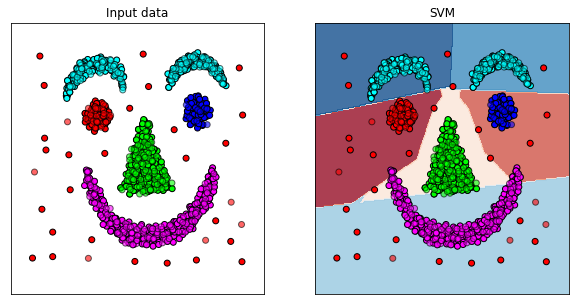

In [87]:
plot_model("SVM",X,y,X_train,X_test,y_train,y_test,classifier)

In [88]:
#scipy.stats.pearsonr(y_test, predictions)

### 2. Logistic

In [89]:
classifier = LogisticRegression(solver='newton-cg')
result = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print(LR_confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)

[[ 0  1  0  0  4  0  1]
 [ 0  0  0 25  0  0  6]
 [ 0  0  1  5  0  4  0]
 [ 0  0  0 49 26  0  0]
 [ 0  0  0 10 98  0  0]
 [ 0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0 55]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        31
           2       1.00      0.10      0.18        10
           4       0.55      0.65      0.60        75
           5       0.77      0.91      0.83       108
           6       0.94      1.00      0.97        64
           7       0.89      1.00      0.94        55

    accuracy                           0.77       349
   macro avg       0.59      0.52      0.50       349
weighted avg       0.70      0.77      0.72       349



xx (219, 292)
yy (219, 292)
(63948,)


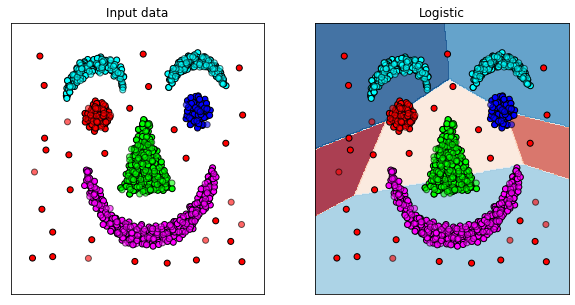

In [90]:
plot_model("Logistic",X,y,X_train,X_test,y_train,y_test,classifier)

### 3. KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  2   0   0   0   3   0   1]
 [  0  31   0   0   0   0   0]
 [  0   0  10   0   0   0   0]
 [  0   0   0  75   0   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  55]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        75
           5       0.97      1.00      0.99       108
           6       1.00      1.00      1.00        64
           7       0.98      1.00      0.99        55

    accuracy                           0.99       349
   macro avg       0.99      0.90      0.93       349
weighted avg       0.99      0.99      0.99       349



xx (219, 292)
yy (219, 292)
(63948,)


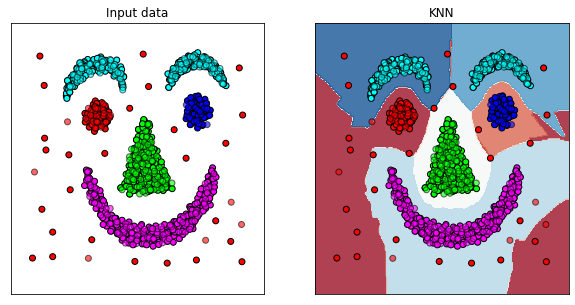

In [92]:
plot_model("KNN",X,y,X_train,X_test,y_train,y_test,classifier)

### 4. Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=30)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[  4   1   0   0   1   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  10   0   0   0   0]
 [  0   0   0  75   0   0   0]
 [  1   0   0   0 107   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  55]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        75
           5       0.99      0.99      0.99       108
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        55

    accuracy                           0.99       349
   macro avg       0.97      0.95      0.96       349
weighted avg       0.99      0.99      0.99       349



xx (219, 292)
yy (219, 292)
(63948,)


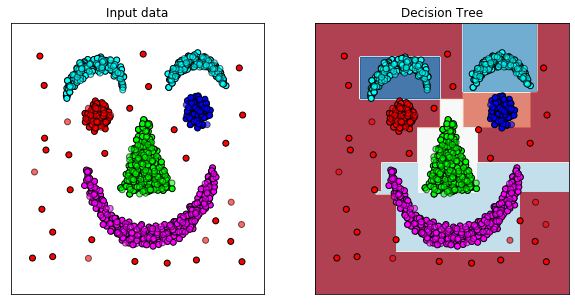

In [94]:
plot_model("Decision Tree",X,y,X_train,X_test,y_train,y_test,classifier)

### 5. Quadratic Discriminant Analysis

In [79]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  2   0   0   0   4   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  10   0   0   0   0]
 [  0   0   0  73   2   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  55]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        10
           4       1.00      0.97      0.99        75
           5       0.95      1.00      0.97       108
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        55

    accuracy                           0.98       349
   macro avg       0.99      0.90      0.92       349
weighted avg       0.98      0.98      0.98       349



### 6. Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  3   1   0   0   2   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  10   0   0   0   0]
 [  0   0   0  74   1   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  55]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        10
           4       1.00      0.99      0.99        75
           5       0.97      1.00      0.99       108
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        55

    accuracy                           0.99       349
   macro avg       0.99      0.93      0.95       349
weighted avg       0.99      0.99      0.99       349



In [81]:
X.describe()
#print(y_pred)

,x,y
count,1.394000e+03,1.394000e+03
mean,3.376862e-16,-2.828122e-16
std,1.000359e+00,1.000359e+00
min,-2.674196e+00,-1.903850e+00
25%,-8.812572e-01,-8.155781e-01
50%,-2.600455e-02,-9.383450e-02
75%,9.322905e-01,1.091726e+00
max,2.148192e+00,1.471829e+00


xx (219, 292)
yy (219, 292)
(63948,)


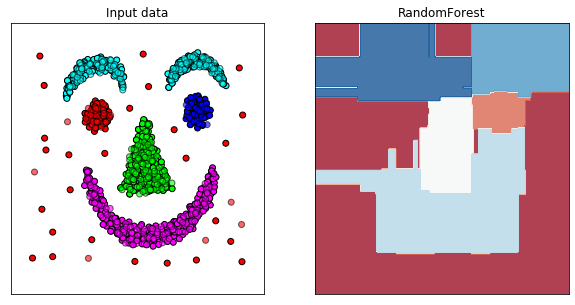

In [82]:
plot_model("RandomForest",X,y,X_train,X_test,y_train,y_test,classifier)

### 7.  GaussianProcessClassifier ( TAKING LONG TIME***)

In [83]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
#classifier =   GaussianProcessClassifier(1.0 * RBF(1.0))
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

### Deep Neural Network


In [ ]:
# Keras and TensorFlow imports for Deep Learning
import keras
import tensorflow as tf

# Using keras with a Scikit-learn wrapper
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

# for defining the Neural-net
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

In [ ]:
def class_model(learn_rate = 0.01):
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
    #Second  Hidden Layer
    classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

return network

In [ ]:
epochs = 100
batch_size = 32
mlpModel = KerasRegressor(reg_model, epochs=epochs, batch_size=batch_size, verbose=1)
mlpModel.fit(X_train, y_train)
y_hat = mlpModel.predict(X_test)
rsquared  = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
print(f"Model coefficient of determination, R^2={rsquared}")
print(f"MSE: {mse}")

In [ ]:
scipy.stats.pearsonr(y_test, y_hat)

### Kernel Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_standard_scaled)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=5)

X_pca_5 = pca.fit_transform(X_back)

principal_X_pca_5 = pd.DataFrame(data = X_pca_5, columns=['principal component 1', 
                                                          'principal component 2',
                                                          'principal component 3', 
                                                          'principal component 4',
                                                          'principal component 5'])

### Linear Regression with 3 principal components as predictors


In [ ]:
X = principal_X_pca_5

y = data["childHeight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2_score(y_test, y_hat)

In [ ]:
scipy.stats.pearsonr(y_test, y_hat)

### Scree Plot

In [ ]:
explained_variance = np.var(X_pca_5, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

var1 = [np.cumsum(explained_variance_ratio)]
var1_new= var1[0].tolist()

N = [1,2,3,4,5]

PCA_table = pd.DataFrame(np.column_stack([N,var1_new]),columns = ['N', 'Cumulative_Variance'])

PCA_table

### Scree Plot

In [ ]:
plt.rcParams["figure.figsize"] = "20,15"
plt.plot(PCA_table.N, PCA_table.Cumulative_Variance , linewidth = 5, c = "red")

plt.xlabel("Number of Principal Components")
plt.xlim(0,5)
plt.ylabel("Cumulative Proportion of Variance Explained")

### K-PCA with 3 Principal Components 

In [ ]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_standard_scaled)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=3)

X_pca_3 = pca.fit_transform(X_back)

In [ ]:
explained_variance = np.var(X_pca_3, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

explained_variance_ratio

np.cumsum(explained_variance_ratio)

In [ ]:
principal_X_pca_3 = pd.DataFrame(data=X_pca_3, columns=['principal component 1', 
                                                        'principal component 2',
                                                        'principal component 3'])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = "20,15"

fig = plt.figure()
axis = Axes3D(fig)

axis.scatter(principal_X_pca_3.iloc[:,0],
             principal_X_pca_3.iloc[:,1],
             principal_X_pca_3.iloc[:,2], c = data.gender, s = 100, alpha=0.6)

axis.set_xlabel("Principal Component 1")
axis.set_ylabel("Principal Component 2")
axis.set_zlabel("Principal Component 3")
plt.show